Mounted at /content/drive
Credit Card Fraud Detection Dataset Loaded Successfully
Paysim Dataset Loaded Successfully
Another Kaggle Credit Card Fraud Dataset Loaded Successfully
--- Credit Card Fraud Detection Dataset ---
Before Preprocessing:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0

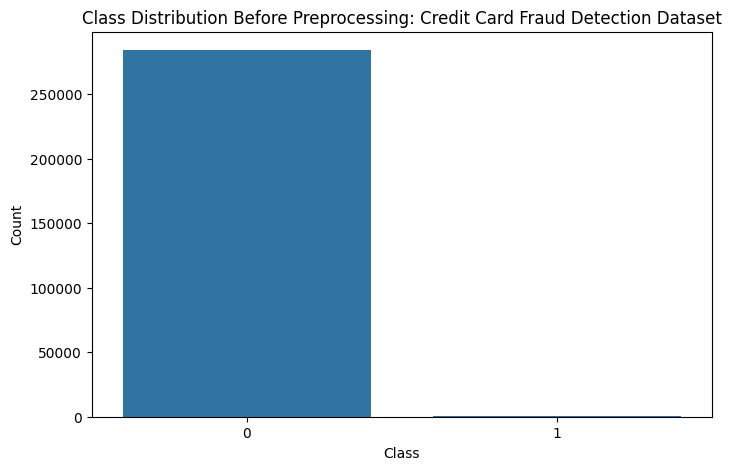

After Preprocessing:
   IsFraud
0        0
1        0
2        0
3        0
4        0 



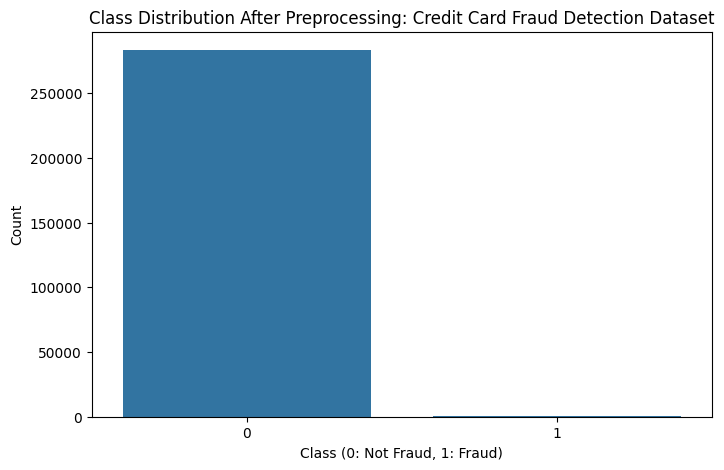

--- Paysim Dataset ---
Before Preprocessing:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0   



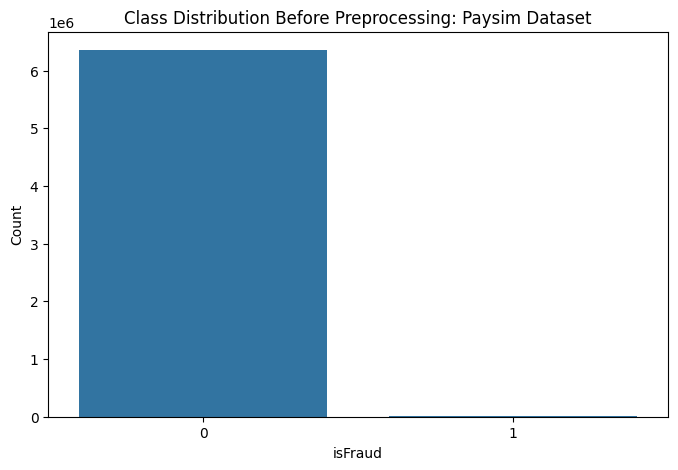

After Preprocessing:
   IsFraud
0        0
1        0
2        1
3        1
4        0 



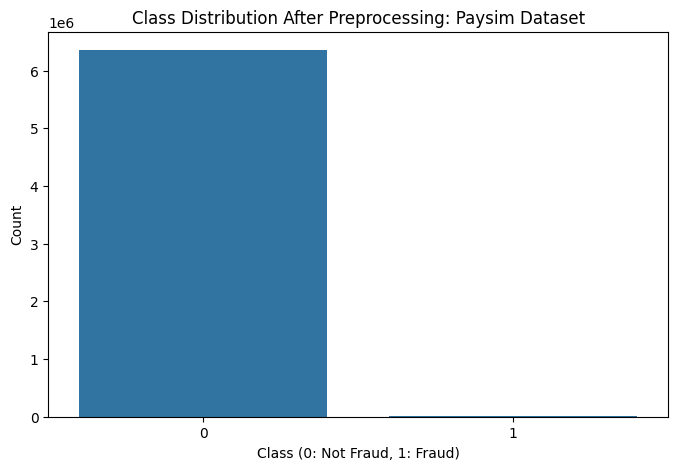

--- Another Kaggle Credit Card Fraud Dataset ---
Before Preprocessing:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PA

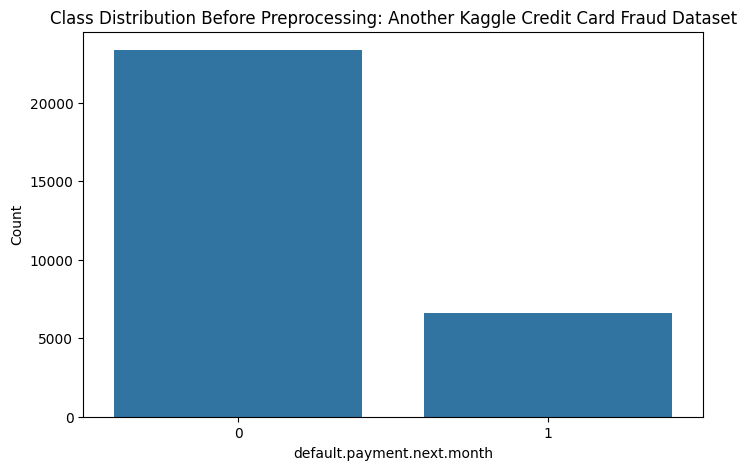

After Preprocessing:
   PAY_AMT4  PAY_AMT5  PAY_AMT6  IsFraud
0       0.0       0.0       0.0        1
1    1000.0       0.0    2000.0        1
2    1000.0    1000.0    5000.0        0
3    1100.0    1069.0    1000.0        0
4    9000.0     689.0     679.0        0 



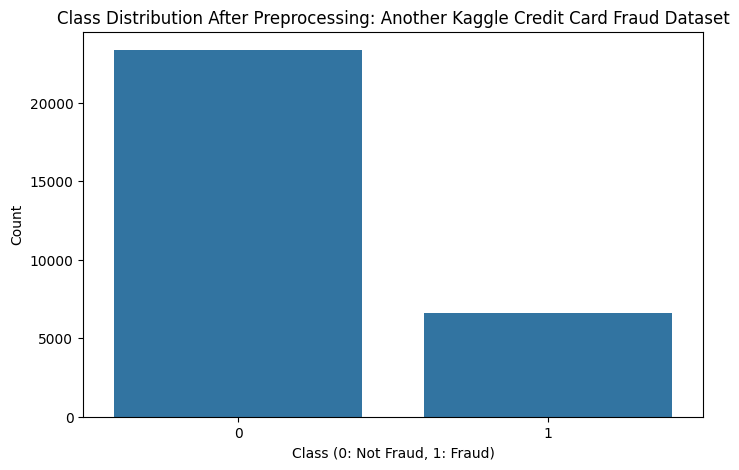

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to datasets in Google Drive
creditcard_path = '/content/drive/My Drive/MSC-Summer-2024/CSE707/Project/Coding/creditcard.csv'  # Update with your path
paysim_path = '/content/drive/My Drive/MSC-Summer-2024/CSE707/Project/Coding/paysim1.csv'  # Update with your path
kaggle_creditcard_path = '/content/drive/My Drive/MSC-Summer-2024/CSE707/Project/Coding/frb.csv'  # Update with your path

# Try-except blocks to load the datasets and handle any potential errors
try:
    df_creditcard = pd.read_csv(creditcard_path, encoding='utf-8')
    print("Credit Card Fraud Detection Dataset Loaded Successfully")
except Exception as e:
    print(f"Error loading Credit Card Fraud Detection dataset: {e}")

try:
    df_paysim = pd.read_csv(paysim_path, encoding='utf-8')
    print("Paysim Dataset Loaded Successfully")
except Exception as e:
    print(f"Error loading Paysim dataset: {e}")

try:
    df_kaggle_creditcard = pd.read_csv(kaggle_creditcard_path, encoding='utf-8')
    print("Another Kaggle Credit Card Fraud Dataset Loaded Successfully")
except Exception as e:
    print(f"Error loading Kaggle Credit Card Fraud dataset: {e}")

# Function to display before and after preprocessing
def display_data_before_after(df, title):
    print(f"--- {title} ---")
    print("Before Preprocessing:")
    print(df.head(), "\n")

    # Dynamically determine fraud column
    if 'Class' in df.columns:
        fraud_column = 'Class'
    elif 'isFraud' in df.columns:
        fraud_column = 'isFraud'
    elif 'default.payment.next.month' in df.columns:  # Check for the actual column name in your dataset
        fraud_column = 'default.payment.next.month'
    else:
        raise ValueError("Fraud column not found in the dataset")

    # Display class distribution before preprocessing
    plt.figure(figsize=(8, 5))
    sns.countplot(x=fraud_column, data=df)
    plt.title(f'Class Distribution Before Preprocessing: {title}')
    plt.xlabel(fraud_column)
    plt.ylabel('Count')
    plt.show()

    # Preprocessing Steps
    df.drop_duplicates(inplace=True)  # Remove duplicates

    # Fill missing values (for numerical columns)
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col].fillna(df[col].median(), inplace=True)

    # Check for PAY_AMT columns and normalize if present
    pay_amt_columns = [f'PAY_AMT{i}' for i in range(4, 7)]
    for col in pay_amt_columns:
        if col in df.columns:
            df[f'Normalized_{col}'] = (df[col] - df[col].mean()) / df[col].std()

    # Prepare relevant columns for display
    relevant_columns = []
    if 'PAY_AMT4' in df.columns:
        relevant_columns.append('PAY_AMT4')
    if 'PAY_AMT5' in df.columns:
        relevant_columns.append('PAY_AMT5')
    if 'PAY_AMT6' in df.columns:
        relevant_columns.append('PAY_AMT6')
    relevant_columns.append(fraud_column)  # Add the fraud column

    df = df[relevant_columns]

    # Rename columns for consistency
    df.columns = [col if col != fraud_column else 'IsFraud' for col in df.columns]

    print("After Preprocessing:")
    print(df.head(), "\n")

    # Display class distribution after preprocessing
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IsFraud', data=df)
    plt.title(f'Class Distribution After Preprocessing: {title}')
    plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
    plt.ylabel('Count')
    plt.show()

# Display and preprocess each dataset
if 'df_creditcard' in locals():
    display_data_before_after(df_creditcard, "Credit Card Fraud Detection Dataset")

if 'df_paysim' in locals():
    display_data_before_after(df_paysim, "Paysim Dataset")

if 'df_kaggle_creditcard' in locals():
    display_data_before_after(df_kaggle_creditcard, "Another Kaggle Credit Card Fraud Dataset")

